# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [111]:
# student 1: ward 8797
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Loading the datasets
trainset_path = 'cancer_train.csv'
testset_path = 'cancer_test.csv'

# Reading the datasets
trainset = pd.read_csv(trainset_path)
testset = pd.read_csv(testset_path)

# Displaying the first five rows of both datasets
trainset_head = trainset.head()
testset_head = testset.head()

trainset_head, testset_head

(   mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  ...  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension  target
 0       13.170         18.66           85.98      534.6          0.11580           0.12310         0.12260              0.07340         0.2128                 0.06777  ...          27.95           102.80       759.4            0.1786             0.4166           0.5006               0.20880          0.3900                  0.11790       0
 1        9.667         18.49           61.49      289.1          0.08946           0.06258         0.02948              0.01514         0.2238                 0.06413  ...          25.62            70.88       385.2            0.1234             0.1542           0.1277               0.06560          0.3174        

In [115]:
# Adjusting the EDA process to match the user's format request

# Display statistical summaries
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 1000)
print("Train Data Description:")
print(trainset.describe())

Train Data Description:
       mean radius  mean texture  mean perimeter    mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  ...  worst texture  worst perimeter   worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension      target
count   455.000000    455.000000      455.000000   455.000000       455.000000        455.000000      455.000000           455.000000     455.000000              455.000000  ...     455.000000       455.000000   455.000000        455.000000         455.000000       455.000000            455.000000      455.000000               455.000000  455.000000
mean     14.257910     19.482835       92.876220   668.580440         0.096224          0.105452        0.090853             0.050013       0.181970                0.062671  ...      25.905626       108.558462   903.095165          0.132501           0.257053         0.27

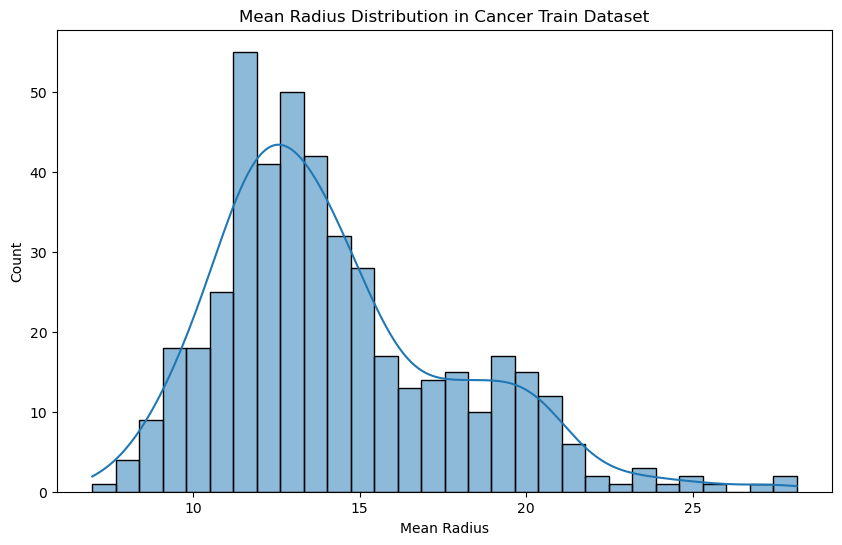

In [116]:
# Visualization 1: Distribution of 'mean radius'
plt.figure(figsize=(10,6))
sns.histplot(trainset['mean radius'].dropna(), kde=True, bins=30)
plt.title('Mean Radius Distribution in Cancer Train Dataset')
plt.xlabel('Mean Radius')
plt.show()

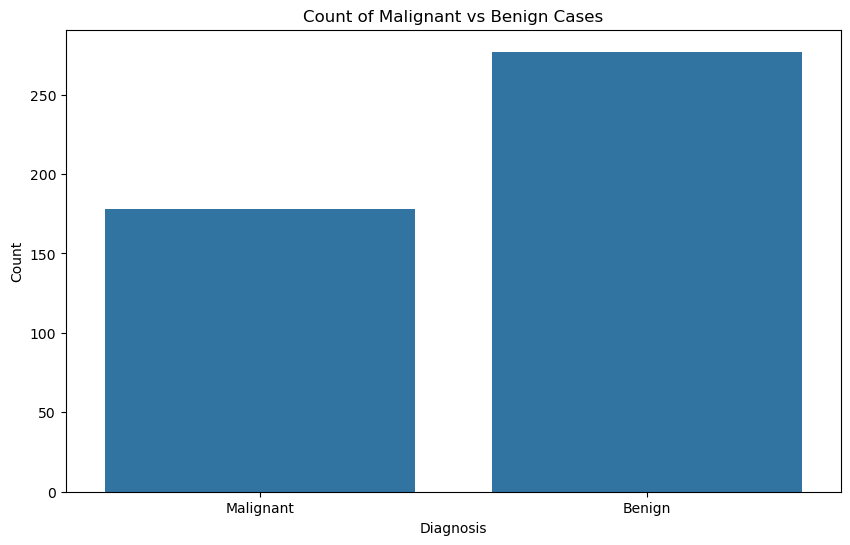

In [117]:
# Visualization 2: Count of Target (Malignant/Benign)
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='target', data=trainset)
plot.set_xticks([0, 1])
plot.set_xticklabels(['Malignant', 'Benign']) 
plt.title('Count of Malignant vs Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

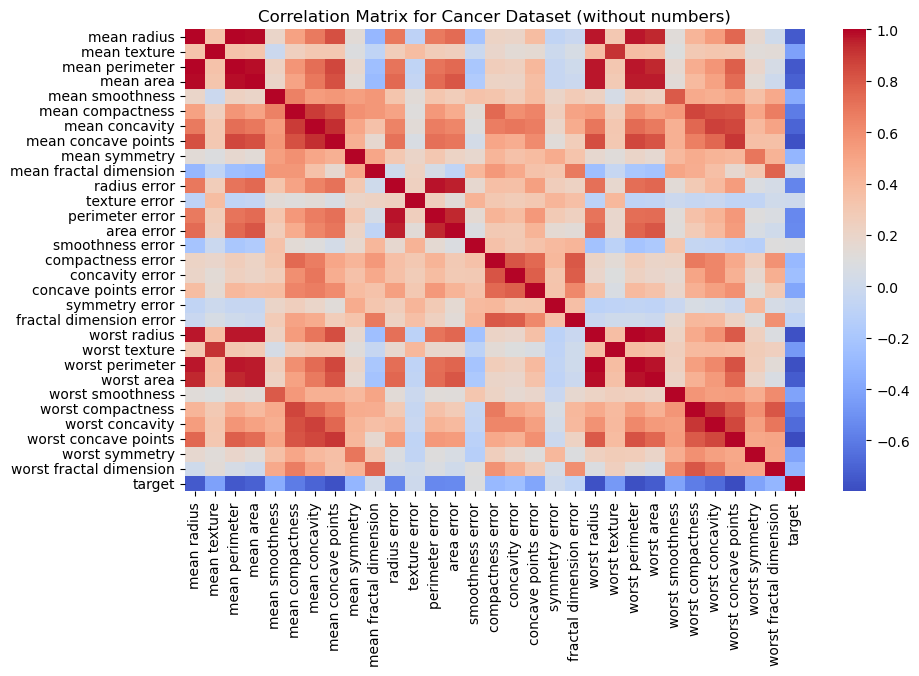

In [118]:
# Visualization 3: Correlation matrix without annotations
plt.figure(figsize=(10,6))
sns.heatmap(trainset.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Cancer Dataset (without numbers)')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [120]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

# Splitting the data into features and target
X = trainset.drop('target', axis=1)
y = trainset['target']

# Defining a macro-average F1 scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Feature Engineering options (with Standardization)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Defining parameter grid for GridSearch with correct param names for each model
param_grid = [
    {'classifier': [SVC()], 'classifier__C': [0.1, 1, 10]},
    {'classifier': [RandomForestClassifier()], 'classifier__max_depth': [5, 10, None]},
]

# Running Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_macro_scorer)
grid_search.fit(X, y)

# Showing the best parameters and results
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Macro-Average F1 Score: {best_score}")

# Summarizing all results in a DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['params', 'mean_test_score']])

Best Parameters: {'classifier': SVC(), 'classifier__C': 10}
Best Macro-Average F1 Score: 0.974449306440782
                                                                    params  mean_test_score
0                              {'classifier': SVC(), 'classifier__C': 0.1}         0.931705
1                                {'classifier': SVC(), 'classifier__C': 1}         0.969774
2                               {'classifier': SVC(), 'classifier__C': 10}         0.974449
3     {'classifier': RandomForestClassifier(), 'classifier__max_depth': 5}         0.955867
4    {'classifier': RandomForestClassifier(), 'classifier__max_depth': 10}         0.965230
5  {'classifier': RandomForestClassifier(), 'classifier__max_depth': None}         0.962949


In [121]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Splitting the data into features and target
X = trainset.drop('target', axis=1)
y = trainset['target']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering - Adding a new feature (perimeter/area ratio)
X_train['perimeter_area_ratio'] = X_train['mean perimeter'] / X_train['mean area']
X_val['perimeter_area_ratio'] = X_val['mean perimeter'] / X_val['mean area']

# Pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('classifier', RandomForestClassifier())  # Classifier
])

# Defining parameter grid for GridSearch
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in RandomForest
    'classifier__max_depth': [5, 10, None],  # Maximum depth of tree
}

# Defining a macro-average F1 scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Running Grid Search with 5-fold Cross-Validation on the training set
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_macro_scorer)
grid_search.fit(X_train, y_train)

# Evaluating on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_f1_score = f1_score(y_val, y_val_pred, average='macro')

# Showing the best parameters and the validation score
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
print(f"Validation Macro-Average F1 Score: {val_f1_score}")

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Validation Macro-Average F1 Score: 0.9668890236506974


In [122]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer

# Splitting the data into features and target
X = trainset.drop('target', axis=1)
y = trainset['target']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering (Optional): Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Defining a macro-average F1 scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Defining parameter grids for SVC and Random Forest
param_grid = [
    {'classifier': [SVC()],
     'classifier__C': [0.1, 1, 10],  # Regularization parameter
     'classifier__kernel': ['linear', 'rbf']},  # Kernel function
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [50, 100, 200],  # Number of trees
     'classifier__max_depth': [5, 10, None]}  # Maximum depth of trees
]

# Pipeline for feature scaling and classification
pipeline = Pipeline([
    ('classifier', SVC())  # This will be replaced dynamically by GridSearchCV
])

# Running Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_macro_scorer)
grid_search.fit(X_train, y_train)

# Best parameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Macro-Average F1 Score: {best_score}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_f1_score = f1_score(y_val, y_val_pred, average='macro')
print(f"Validation F1 Macro Score: {val_f1_score}")


Best Parameters: {'classifier': SVC(), 'classifier__C': 1, 'classifier__kernel': 'linear'}
Best Macro-Average F1 Score: 0.9763933363378321
Validation F1 Macro Score: 0.9559108527131783


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [124]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [125]:
# Splitting the data into features and target
X = trainset.drop('target', axis=1)
y = trainset['target']

# Feature Engineering: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the best model based on previous cross-validation
best_model = SVC(C=1, kernel='linear')  # Best parameters found

# Pipeline for feature scaling and training the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature engineering: Standardization
    ('classifier', SVC(C=1, kernel='linear'))  # SVC with best hyperparameters
])

# Training the model on the entire dataset
pipeline.fit(X, y)

print("Model training complete with best feature engineering, model, and hyperparameters.")

Model training complete with best feature engineering, model, and hyperparameters.


## Part 5 - Apply on test and show model performance estimation

In [127]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [128]:
# Splitting the test set into features and target
X_test = testset.drop('target', axis=1)
y_test = testset['target']

# Feature Engineering: Standardization (using the same scaler as used in training)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Using the trained model from part 4 (SVC with C=1, kernel='linear')
best_model = SVC(C=1, kernel='linear')

# Train the model on the full train set (retrain from part 4)
X_train = trainset.drop('target', axis=1)
y_train = trainset['target']

X_train_scaled = scaler.fit_transform(X_train)
best_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Displaying the first 5 predictions on the test set
print("First 5 predictions on the test set:", y_test_pred[:5])
print("Actual values of the first 5 test set samples:", y_test[:5].values)

# Calculate the F1 Macro score on the test set
test_f1_score = f1_score(y_test, y_test_pred, average='macro')
print(f"Test Set F1 Macro Score: {test_f1_score}")


First 5 predictions on the test set: [1 0 0 1 1]
Actual values of the first 5 test set samples: [1 1 0 1 1]
Test Set F1 Macro Score: 0.8755353993449231
